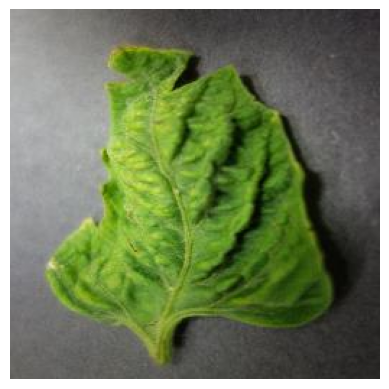

The predicted disease type is: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [6]:
import torch
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt
from transformers import ViTModel, ViTConfig  # Add this import

# Define the class names as per your training dataset
class_names = [
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight", 
    "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", 
    "Tomato___Spider_mites_Two-spotted_spider_mite", "Tomato___Target_Spot", 
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Tomato___Tomato_mosaic_virus", 
    "Tomato___healthy"
]

# Data transformations for the test image
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the trained model
class CustomModel(nn.Module):
    def __init__(self, vit_model):
        super(CustomModel, self).__init__()
        self.vit_model = vit_model
        self.fc = nn.Linear(vit_model.config.hidden_size, len(class_names))

    def forward(self, x):
        outputs = self.vit_model(x).pooler_output
        x = self.fc(outputs)
        return x

# Configuration for ViT
config = ViTConfig.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTModel(config)
model = CustomModel(vit_model)

# Load the trained model weights
model.load_state_dict(torch.load('best_model.pth', map_location=torch.device('cpu')))
model.eval()

# Function to predict the disease type from an image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    image = test_transforms(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        class_name = class_names[predicted.item()]
    return class_name

# Test the model with an example image
image_path = 'D:/Publish Paper/Dataset plant/test/test/TomatoYellowCurlVirus4.JPG'
disease_type = predict_image(image_path)
print(f'The predicted disease type is: {disease_type}')
